In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("aug_train.csv.zip")


In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
df.shape

(19158, 14)

In [6]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [7]:
for col in df:
    if df[col].dtypes=='object':
        
        print(f'{col}:{df[col].unique()}')

city:['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'
 'city_77' 'city_81' 'city_131' 'city_44' 'city

In [8]:
## define a Function
def unique_col(df):
     for col in df:
        if df[col].dtypes=='object':
            print(f'{col}:{df[col].unique()}')

In [9]:
## Drop the unnecessary Columns
df.drop(columns=['city','enrollee_id'],axis=1,inplace=True)


In [10]:
df.isnull().sum()

city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

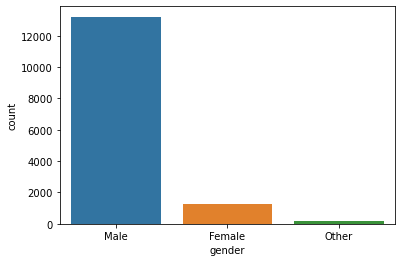

In [11]:
sns.countplot(df['gender'],)

In [12]:
df['gender'].fillna('Male',inplace=True)

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

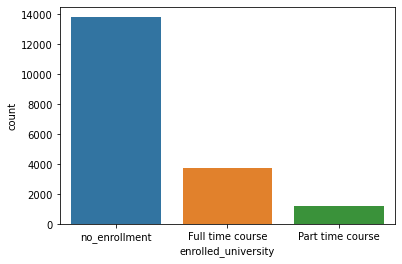

In [13]:
sns.countplot(df['enrolled_university'])

In [14]:
df['enrolled_university'].fillna('no_enrollment',inplace=True)

<AxesSubplot:xlabel='education_level', ylabel='count'>

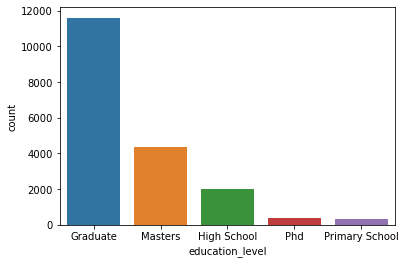

In [15]:
sns.countplot(df['education_level'])

In [16]:
df['education_level'].fillna('Graduate',inplace=True)

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

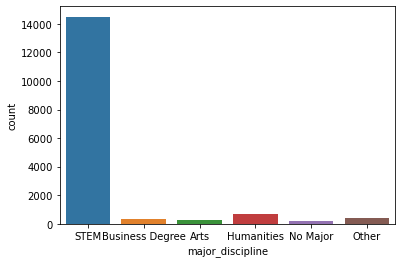

In [17]:
sns.countplot(df['major_discipline'])

In [18]:
df['major_discipline'].fillna('STEM',inplace=True)

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

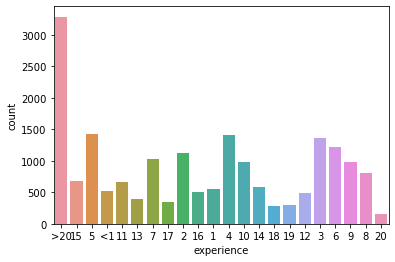

In [19]:
sns.countplot(df['experience'])
df['experience'].value_counts()

In [20]:
df['experience'].isnull().sum()

65

In [21]:
experience_mapper = {
    '<1'      :    0,'1'       :    1, '2'       :    2, '3'       :    3, '4'       :    4, '5'       :    5,
    '6'       :    6,'7'       :    7,'8'       :    8,  '9'       :    9, '10'      :    10, '11'      :    11,
    '12'      :    12,'13'      :    13, '14'      :    14, '15'      :    15, '16'      :    16,'17'      :    17,
    '18'      :    18,'19'      :    19, '20'      :    20, '>20'     :    21
} 

In [22]:
df['experience']=df['experience'].map(experience_mapper)

In [23]:
df['experience'].fillna(0,inplace=True)

<AxesSubplot:xlabel='company_size', ylabel='count'>

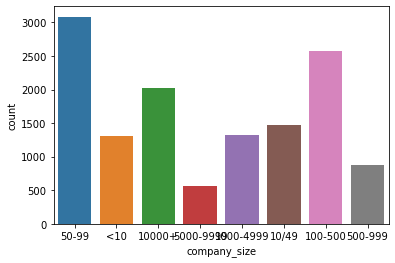

In [24]:
sns.countplot(df['company_size'])

In [25]:
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [26]:
com_size_map={'<10':0,'10/19':1,'50-99':2,'100-500':3,'500-999':4,'1000-4999':5,'5000-9999':6,'10000+':7}

In [27]:
df['company_size']=df['company_size'].map(com_size_map)

In [28]:
df['company_size'].fillna(2,inplace=True)

In [29]:
df.replace({'Has relevent experience':'Experience','No relevent experience':'No Experience'},inplace=True)


<AxesSubplot:xlabel='company_type', ylabel='count'>

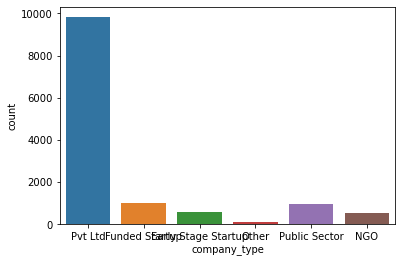

In [30]:
sns.countplot(df['company_type'])

In [31]:
df['company_type'].fillna('Pvt Ltd',inplace=True)

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

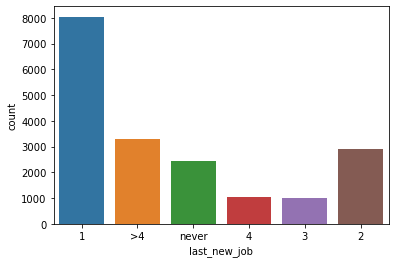

In [32]:
sns.countplot(df['last_new_job'])

In [33]:
df['last_new_job'].isnull().sum()

423

In [34]:
map_lastjob={'1':1,'2':2,'3':3,'4':4,'>4':5}
df['last_new_job']=df['last_new_job'].map(map_lastjob)

In [35]:
df['last_new_job'].fillna(1,inplace=True)

In [36]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Experience,no_enrollment,Graduate,STEM,21.0,2.0,Pvt Ltd,1.0,36,1.0
1,0.776,Male,No Experience,no_enrollment,Graduate,STEM,15.0,2.0,Pvt Ltd,5.0,47,0.0
2,0.624,Male,No Experience,Full time course,Graduate,STEM,5.0,2.0,Pvt Ltd,1.0,83,0.0
3,0.789,Male,No Experience,no_enrollment,Graduate,Business Degree,0.0,2.0,Pvt Ltd,1.0,52,1.0
4,0.767,Male,Experience,no_enrollment,Masters,STEM,21.0,2.0,Funded Startup,4.0,8,0.0


In [37]:
df.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# Let's Understand the Target Data

In [38]:
val=df['target'].value_counts()
val

0.0    14381
1.0     4777
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x18fc1367340>,
 [Text(-0.7794102441957483, 0.7762214060709253, 'No'),
  Text(0.7794103168708381, -0.776221333097268, 'Yes')],
 [Text(-0.42513286047040816, 0.42339349422050465, '75.07%'),
  Text(0.4251329001113662, -0.42339345441669163, '24.93%')])

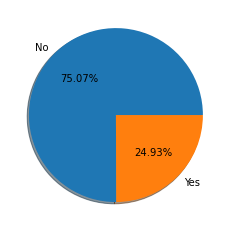

In [39]:
val=df['target'].value_counts().to_list()
col=['No','Yes']
plt.pie(x=val,labels=col,shadow=True,autopct='%.2f%%')

dataset seems to be imbalance

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

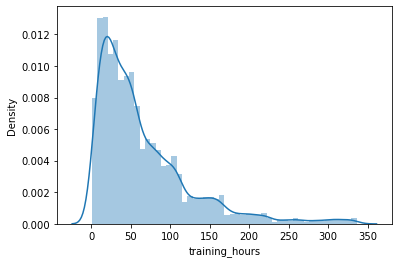

In [40]:
sns.distplot(df['training_hours'])

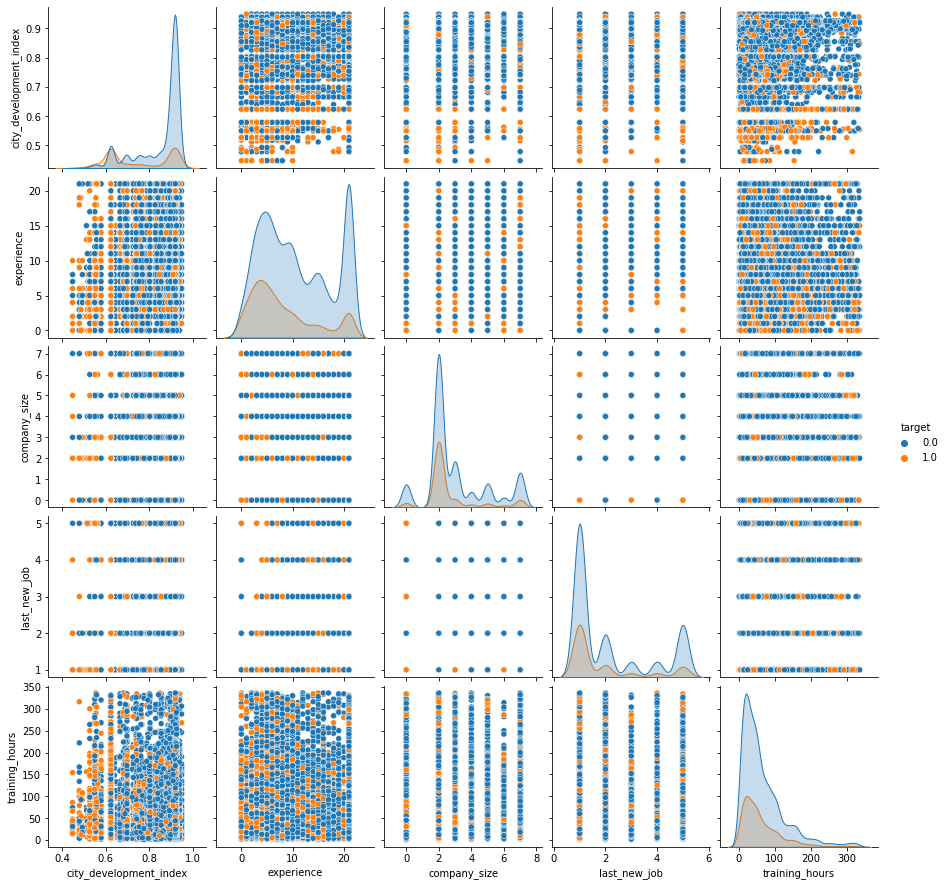

In [41]:
sns.pairplot(df,hue='target')

<AxesSubplot:xlabel='education_level', ylabel='count'>

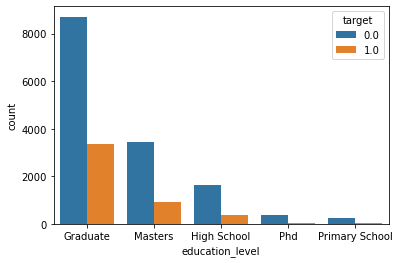

In [42]:
sns.countplot(x=df['education_level'],hue='target',data=df)

Observation: Graduates are more likly to looking for  job

In [43]:
df.columns

Index(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

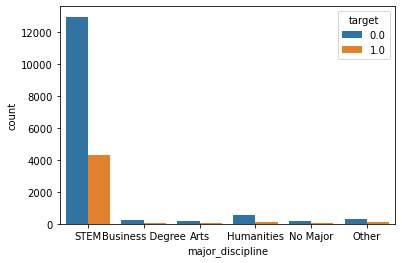

In [44]:
sns.countplot(x=df['major_discipline'],hue='target',data=df)

STEM people are more looking for job change

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

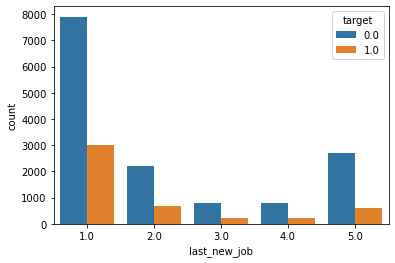

In [45]:
sns.countplot(x=df['last_new_job'],hue='target',data=df)

Person with 1 year of experience are more incline to change job

<AxesSubplot:xlabel='company_type', ylabel='count'>

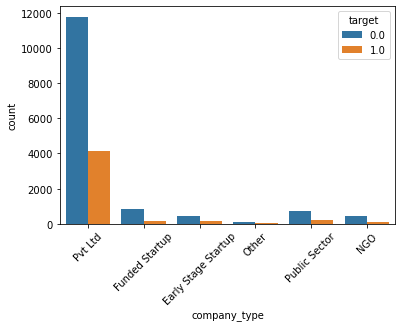

In [46]:
plt.xticks(rotation=45)
sns.countplot(x=df['company_type'],hue='target',data=df)

<AxesSubplot:xlabel='training_hours', ylabel='Count'>

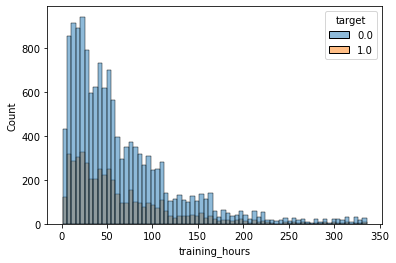

In [47]:
sns.histplot(x=df['training_hours'],hue='target',data=df)

Observation -----More Training hours hava less tendency to job change

In [48]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Experience,no_enrollment,Graduate,STEM,21.0,2.0,Pvt Ltd,1.0,36,1.0
1,0.776,Male,No Experience,no_enrollment,Graduate,STEM,15.0,2.0,Pvt Ltd,5.0,47,0.0
2,0.624,Male,No Experience,Full time course,Graduate,STEM,5.0,2.0,Pvt Ltd,1.0,83,0.0
3,0.789,Male,No Experience,no_enrollment,Graduate,Business Degree,0.0,2.0,Pvt Ltd,1.0,52,1.0
4,0.767,Male,Experience,no_enrollment,Masters,STEM,21.0,2.0,Funded Startup,4.0,8,0.0


# Train Test Split

In [49]:
x=df.drop(columns=['target'],axis=1)
y=df['target']


# Encoding the Data

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [51]:
for col in x:
    if x[col].dtype=='object':
        x[col]=le.fit_transform(x[col])

In [52]:
x.head(5)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.920,1,0,2,0,5,21.0,2.0,5,1.0,36
1,0.776,1,1,2,0,5,15.0,2.0,5,5.0,47
2,0.624,1,1,0,0,5,5.0,2.0,5,1.0,83
3,0.789,1,1,2,0,1,0.0,2.0,5,1.0,52
4,0.767,1,0,2,2,5,21.0,2.0,1,4.0,8


# Train_Test_split

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=45)

In [54]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((13410, 11), (5748, 11), (13410,), (5748,))

# Machine Learning Operation

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [56]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier()]

In [57]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score',accuracy_score(y_test,predm))
    print('Confusion Matrix',confusion_matrix(y_test,predm))
    print('Classification Report',classification_report(y_test,predm))

Accuracy score 0.7506958942240779
Confusion Matrix [[4123  150]
 [1283  192]]
Classification Report               precision    recall  f1-score   support

         0.0       0.76      0.96      0.85      4273
         1.0       0.56      0.13      0.21      1475

    accuracy                           0.75      5748
   macro avg       0.66      0.55      0.53      5748
weighted avg       0.71      0.75      0.69      5748

Accuracy score 0.7051148225469729
Confusion Matrix [[3425  848]
 [ 847  628]]
Classification Report               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      4273
         1.0       0.43      0.43      0.43      1475

    accuracy                           0.71      5748
   macro avg       0.61      0.61      0.61      5748
weighted avg       0.71      0.71      0.71      5748

Accuracy score 0.7433890048712596
Confusion Matrix [[4273    0]
 [1475    0]]
Classification Report               precision    recall  f1-score   

# Conclusion--- Accuracy is very Bad in Each Case

# Dataset was unbalance So lets Apply the SMOTE Opeartion

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
sm=SMOTE(random_state=42)

In [70]:
x_smote,y_smote=sm.fit_resample(x,y)
sx_train,sx_test,yx_train,yx_test=train_test_split(x_smote,y_smote,test_size=.25,random_state=45)
yx_train.value_counts()  ## Over Sampling Done

1.0    10811
0.0    10760
Name: target, dtype: int64

In [69]:
sx_train.shape,sx_test.shape,yx_train.shape,yx_test.shape

((21571, 11), (7191, 11), (21571,), (7191,))

In [72]:
for m in model:
    m.fit(sx_train,yx_train)
    predm=m.predict(sx_test)
    print('Accuracy score',accuracy_score(yx_test,predm))
    print('Confusion Matrix',confusion_matrix(yx_test,predm))
    print('Classification Report',classification_report(yx_test,predm))

Accuracy score 0.69002920317063
Confusion Matrix [[2746  875]
 [1354 2216]]
Classification Report               precision    recall  f1-score   support

         0.0       0.67      0.76      0.71      3621
         1.0       0.72      0.62      0.67      3570

    accuracy                           0.69      7191
   macro avg       0.69      0.69      0.69      7191
weighted avg       0.69      0.69      0.69      7191

Accuracy score 0.7587261855096649
Confusion Matrix [[2697  924]
 [ 811 2759]]
Classification Report               precision    recall  f1-score   support

         0.0       0.77      0.74      0.76      3621
         1.0       0.75      0.77      0.76      3570

    accuracy                           0.76      7191
   macro avg       0.76      0.76      0.76      7191
weighted avg       0.76      0.76      0.76      7191

Accuracy score 0.6146572104018913
Confusion Matrix [[2017 1604]
 [1167 2403]]
Classification Report               precision    recall  f1-score   su

conclusion------ RandomForestClassifier gives us a Improved 81 % efficiency

# Let's Apply and Check Scaling and Apply

In [76]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
sxm_train=MM.fit_transform(sx_train)
sxm_test=MM.fit_transform(sx_test)

In [80]:
for m in model:
    m.fit(sxm_train,yx_train)
    predm=m.predict(sxm_test)
    print('Accuracy score',accuracy_score(yx_test,predm))
    print('Confusion Matrix',confusion_matrix(yx_test,predm))
    print('Classification Report',classification_report(yx_test,predm))

Accuracy score 0.704352663051036
Confusion Matrix [[2657  964]
 [1162 2408]]
Classification Report               precision    recall  f1-score   support

         0.0       0.70      0.73      0.71      3621
         1.0       0.71      0.67      0.69      3570

    accuracy                           0.70      7191
   macro avg       0.70      0.70      0.70      7191
weighted avg       0.70      0.70      0.70      7191

Accuracy score 0.7566402447503824
Confusion Matrix [[2687  934]
 [ 816 2754]]
Classification Report               precision    recall  f1-score   support

         0.0       0.77      0.74      0.75      3621
         1.0       0.75      0.77      0.76      3570

    accuracy                           0.76      7191
   macro avg       0.76      0.76      0.76      7191
weighted avg       0.76      0.76      0.76      7191

Accuracy score 0.7174245584758726
Confusion Matrix [[2609 1012]
 [1020 2550]]
Classification Report               precision    recall  f1-score   s

# Cross Validation

In [86]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
## cross Validation
from sklearn.model_selection import cross_val_score
cross_validation=cross_val_score(estimator=rc,X=sx_train,y=yx_train,cv=10)
print('Cross Validation of Random Forest classifier',cross_validation)
print('Cross validation of Random Forest Classsifier(in Mean):',cross_validation.mean())

Cross Validation of Random Forest classifier [0.8141798  0.81409365 0.82800185 0.82892907 0.81687529 0.82707464
 0.80667594 0.81548447 0.82012054 0.81919332]
Cross validation of Random Forest Classsifier(in Mean): 0.8190628567549325


# Saving the Model

In [94]:
import pickle
filename='jobhuntRF.pkl'
#save model
pickle.dump(rc,open(filename,'wb'))
#load model to file
loaded_model=pickle.load(open(filename,'rb'))